Líbrerias


In [0]:
import pandas as pd
from google.colab import drive
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.pipeline import Pipeline

Elegir la carpeta de Drive como directorio local

In [2]:
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


Leer los datos 

In [0]:
datosn = pd.read_csv('/gdrive/My Drive/Competencia/DatosNegativos2.csv')
datosp = pd.read_csv('/gdrive/My Drive/Competencia/DatosPositivos2.csv')

In [4]:
datosn.shape

(13679, 1760)

In [5]:
datosp.shape

(8322, 1761)

La idea es unir las dos bases de datosn y datosp, pero para ello nos damos cuenta que la segunda base tiene una variable adicional, listaremos las variables para saber cual es. 

In [0]:
datosn.dtypes

sequence                             object
length                                int64
molecular_weight                    float64
charge                              float64
charge_density                      float64
isoelectric_point                   float64
gravy                               float64
instability_index                   float64
aromaticity                         float64
aliphatic_index                     float64
boman_index                         float64
hydrophobic_ratio                   float64
A                                   float64
R                                   float64
N                                   float64
D                                   float64
C                                   float64
E                                   float64
Q                                   float64
G                                   float64
H                                   float64
I                                   float64
L                               

In [0]:
datosp.dtypes

Unnamed: 0                            int64
sequence                             object
length                                int64
molecular_weight                    float64
charge                              float64
charge_density                      float64
isoelectric_point                   float64
gravy                               float64
instability_index                   float64
aromaticity                         float64
aliphatic_index                     float64
boman_index                         float64
hydrophobic_ratio                   float64
A                                   float64
R                                   float64
N                                   float64
D                                   float64
C                                   float64
E                                   float64
Q                                   float64
G                                   float64
H                                   float64
I                               

Al iniciar la listas de ambas bases nos damos cuenta que la diferencia es la variable llamada Unnamed:0, vamos a visualizarla.

In [6]:
datosp.head()

,Unnamed: 0,sequence,length,molecular_weight,charge,charge_density,isoelectric_point,gravy,instability_index,aromaticity,aliphatic_index,boman_index,hydrophobic_ratio,A,R,N,D,C,E,Q,G,H,I,L,K,M,F,P,S,T,W,Y,V,AA,AR,AN,AD,AC,AE,AQ,...,embed_2_61,embed_2_62,embed_2_63,embed_2_64,embed_2_65,embed_2_66,embed_2_67,embed_2_68,embed_2_69,embed_2_70,embed_2_71,embed_2_72,embed_2_73,embed_2_74,embed_2_75,embed_2_76,embed_2_77,embed_2_78,embed_2_79,embed_2_80,embed_2_81,embed_2_82,embed_2_83,embed_2_84,embed_2_85,embed_2_86,embed_2_87,embed_2_88,embed_2_89,embed_2_90,embed_2_91,embed_2_92,embed_2_93,embed_2_94,embed_2_95,embed_2_96,embed_2_97,embed_2_98,embed_2_99,class
0,0,CGGYSGGWKRKRSTSYRCG,19,2109.36,4.859,0.002304,10.056702,-1.310526,73.031579,0.157895,0.000000,3.122105,0.105263,0.000,15.789,0.0,0.0,10.526,0.0,0.0,26.316,0.00,0.00,0.000,10.526,0.000,0.000,0.000,15.789,5.263,5.263,10.526,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.075590,0.296535,-0.677439,-0.851556,0.332322,0.307534,-0.934734,0.639869,0.268721,0.754809,-0.110266,-0.196712,-0.045030,0.896194,-0.515224,-0.186160,0.702498,0.222887,-0.431514,0.004193,0.106806,0.199192,0.421206,-0.720576,0.439543,-0.814577,0.542674,0.327480,0.451599,-0.374047,0.921890,0.086883,-0.264126,0.593641,0.272707,-1.412352,-0.050157,-0.657932,0.072015,1
1,1,GIMISLMKKLAAHIAK,16,1725.22,3.094,0.001793,10.302063,0.887500,20.918750,0.000000,140.625000,-0.685000,0.625000,18.750,0.000,0.0,0.0,0.000,0.0,0.0,6.250,6.25,18.75,12.500,18.750,12.500,0.000,0.000,6.250,0.000,0.000,0.000,0.0,6.67,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.209348,0.021843,-1.087510,-0.781188,0.408900,0.079849,-0.501484,0.385953,0.421871,0.279649,-0.165011,-0.063239,-0.146871,0.268725,-0.071581,-0.152268,0.644949,-0.384647,-0.419641,-0.190870,-0.035953,0.883951,0.111531,-0.669440,0.241797,-0.413818,0.688888,0.539756,0.168385,-0.168786,0.612335,-0.424749,-0.604363,-0.107965,-0.103306,-1.036699,-0.512895,-0.274436,-0.125522,1
2,2,FKAWRWAWRMKKLAAPS,17,2133.57,4.995,0.002341,12.024475,-0.594118,43.088235,0.235294,46.470588,1.494706,0.411765,23.529,11.765,0.0,0.0,0.000,0.0,0.0,0.000,0.00,0.00,5.882,17.647,5.882,5.882,5.882,5.882,0.000,17.647,0.000,0.0,6.25,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.434286,-0.543370,-0.563254,-0.481423,0.699644,0.227808,-0.680200,0.371845,-0.182639,0.318903,-0.400308,0.237055,-0.589457,0.555851,0.129094,-0.425677,0.913427,-0.469834,-0.918976,-0.785608,0.435777,0.636395,0.784406,-0.661122,0.697260,-1.021734,1.050570,0.505323,-0.519617,-0.121807,1.164646,0.292256,-0.114444,1.073405,0.884583,-2.475456,-0.661676,-0.497003,0.223890,1
3,3,WGWRDIVAGIRKVAAPVLST,20,2195.57,1.996,0.000909,10.835022,0.435000,17.010000,0.100000,117.000000,0.561500,0.450000,15.000,10.000,0.0,5.0,0.000,0.0,0.0,10.000,0.00,10.00,5.000,5.000,0.000,0.000,5.000,5.000,5.000,10.000,0.000,15.0,5.26,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.157962,0.379280,-0.757595,-1.078672,0.756867,0.379479,-0.928272,0.611120,-0.149692,0.719999,-0.534426,0.084668,0.201529,0.037534,-0.362736,-0.173763,0.229293,-0.199606,-0.909858,-0.149773,0.174392,-0.015831,0.573899,-1.010178,0.787714,-1.113688,0.867610,0.428287,0.082314,-0.591859,1.735344,-0.013287,-0.684307,0.938154,0.553792,-1.643541,-0.550338,-0.524435,0.252785,1
4,4,DTHFPICIFCCGCCRQSNCGMCCKT,25,2774.34,0.555,0.000200,7.713074,0.392000,31.272000,0.080000,31.200000,0.972000,0.520000,0.000,4.000,4.0,4.0,32.000,0.0,4.0,8.000,4.00,8.00,0.000,4.000,4.000,8.000,4.000,4.000,8.000,0.000,0.000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.613098,0.752622,-0.769190,-0.489062,0.503171,0.650787,-0.523382,0.019970,-0.012003,1.158296,-0.594083,-0.378756,0.093352,0.447195,0.175899,0.386873,1.395994,0.004446,-0.412632,-0.357491,-0.312645,0.446376,0.040463,-0.474146,0.948174,-0.620298,0.664511,0.795336,-0.057320,-1.303950,1.459582,-0.946822,0.029422,0.634483,1.211366,-2.779123,-0.945796,-1.264345,-0.040525,1


Nos damos cuenta que es un simple id de los datos , por tanto podemos proceder a eliminarla 

In [0]:
datosp = datosp.drop(['Unnamed: 0'],axis=1)

Procederemos ya con las bases con el mismo número de columnas a unirlas en un solo dataframe

In [0]:
datos = pd.concat([datosn,datosp], ignore_index=True)

Las variables son númericas y poseemos 1760. Por tanto procederemos a normalizar los datos. Quitaremos la variable sequence que es string.

In [0]:
secuence = datos['sequence']
clase = datos['class']

In [0]:
datos2 = datos.drop(['sequence','class'],axis=1)

In [0]:
columnas = datos2.columns.values.tolist()

In [0]:
scaler = StandardScaler()

In [0]:
datos3 = scaler.fit_transform(datos2)

In [0]:
datos4 = pd.DataFrame(data=datos3,columns=columnas)

In [15]:
datos4.head()

,length,molecular_weight,charge,charge_density,isoelectric_point,gravy,instability_index,aromaticity,aliphatic_index,boman_index,hydrophobic_ratio,A,R,N,D,C,E,Q,G,H,I,L,K,M,F,P,S,T,W,Y,V,AA,AR,AN,AD,AC,AE,AQ,AG,AH,...,embed_2_60,embed_2_61,embed_2_62,embed_2_63,embed_2_64,embed_2_65,embed_2_66,embed_2_67,embed_2_68,embed_2_69,embed_2_70,embed_2_71,embed_2_72,embed_2_73,embed_2_74,embed_2_75,embed_2_76,embed_2_77,embed_2_78,embed_2_79,embed_2_80,embed_2_81,embed_2_82,embed_2_83,embed_2_84,embed_2_85,embed_2_86,embed_2_87,embed_2_88,embed_2_89,embed_2_90,embed_2_91,embed_2_92,embed_2_93,embed_2_94,embed_2_95,embed_2_96,embed_2_97,embed_2_98,embed_2_99
0,-1.514024,-1.579527,0.253299,1.408902,1.169415,-0.916030,0.928213,-1.269079,-1.103023,1.216043,0.219189,2.931984,0.804860,1.956354,-0.690811,-0.638053,-0.69519,-0.432758,-0.902029,-0.624093,-0.883704,-0.952024,0.636993,2.026864,-0.821284,-0.745835,-0.865377,1.685636,-0.577118,-0.704628,-0.881001,6.889079,-0.211631,-0.17783,-0.179048,-0.166896,-0.184666,-0.120244,-0.2544,-0.167058,...,-0.234231,0.588087,-0.195648,1.240771,1.474604,-1.678107,-1.096599,1.391259,-0.969127,-0.896040,-1.245781,1.411091,0.301496,-0.231272,-0.907687,0.565374,-0.203741,-1.290431,0.024113,1.130525,0.680171,0.755188,-1.337014,-1.101707,1.365774,-1.347191,1.159304,-0.941006,-0.968165,-0.248770,1.270365,-1.279222,1.083433,1.374653,-0.435488,-1.055021,1.419922,1.220006,1.233390,-0.228330
1,-1.514024,-1.509540,-0.101136,0.413288,0.211832,-0.530950,1.052205,-1.269079,-0.506175,0.773160,0.219189,-0.855656,0.804860,-0.748756,1.929725,-0.638053,-0.69519,-0.432758,1.182301,-0.624093,-0.883704,0.601018,0.636993,4.823592,-0.821284,-0.745835,-0.865377,-0.805788,-0.577118,-0.704628,-0.881001,-0.259575,-0.211631,-0.17783,-0.179048,-0.166896,-0.184666,-0.120244,-0.2544,-0.167058,...,0.063250,0.693743,-0.651490,1.088490,1.163001,-0.895547,-1.188903,1.302982,-0.692723,-0.378981,-1.243861,0.877052,0.300217,-0.387790,-0.906120,1.155683,-0.176323,-1.432024,0.452906,1.043566,0.251425,0.436984,-1.169285,-1.134664,1.515259,-1.501957,1.726279,-1.269316,-1.110915,-0.584656,0.813498,-1.040748,0.177430,1.265015,-0.548034,-0.554229,1.573343,0.937539,1.196791,-0.085541
2,-1.514024,-1.411265,-0.066401,0.413852,0.161288,-1.220885,2.027486,0.134366,-0.506175,0.479357,-0.782618,-0.855656,-0.772439,1.956354,-0.690811,-0.638053,-0.69519,3.253828,-0.902029,1.934712,1.365231,-0.952024,0.636993,2.026864,-0.821284,-0.745835,-0.865377,-0.805788,-0.577118,2.052972,-0.881001,-0.259575,-0.211631,-0.17783,-0.179048,-0.166896,-0.184666,-0.120244,-0.2544,-0.167058,...,0.366806,1.218718,-0.626008,1.028002,1.104479,-1.091976,-1.386312,0.962058,-0.956476,-0.586469,-1.077762,1.415349,-0.263986,-0.257456,-0.718478,0.960458,0.161473,-0.950274,-0.085928,1.582527,0.244792,0.011765,-0.703574,-0.779364,1.199498,-1.723558,1.817113,-0.845062,-1.074467,-1.152347,1.402565,-1.675095,0.427000,1.000130,-0.734731,-0.903673,1.603192,1.220673,0.942420,-0.367752
3,-1.514024,-1.519080,-0.455572,-0.453084,-0.925878,1.073550,0.389028,0.134366,1.944046,-1.465670,0.219189,-0.855656,-0.772439,1.956354,-0.690811,-0.638053,-0.69519,-0.432758,-0.902029,-0.624093,1.365231,2.153952,-0.819986,-0.770061,-0.821284,1.494235,1.448175,-0.805788,1.466380,-0.704628,-0.881001,-0.259575,-0.211631,-0.17783,-0.179048,-0.166896,-0.184666,-0.120244,-0.2544,-0.167058,...,0.378349,0.475000,-0.668740,1.898440,1.315011,-0.810417,-0.856604,1.102458,-1.109550,-0.438341,-1.087451,1.409034,0.000802,-0.038242,-0.516960,1.350649,-0.636918,-1.326450,-0.739592,0.872766,0.699157,-0.553479,-0.531333,-0.820574,1.071233,-1.376096,1.760526,-1.399314,-1.278411,-0.422753,0.356839,-1.566138,0.543404,0.582714,-0.630346,-1.855441,1.517942,1.331998,0.650262,0.213560
4,-1.514024,-1.448004,-0.385748,-0.292019,-0.480791,-0.787670,2.698811,0.134366,-1.731285,-0.139634,-0.782618,-0.855656,-0.772439,-0.748756,-0.690811,-0.638053,-0.69519,-0.432758,-0.902029,4.493338,-0.883704,-0.952024,-0.819986,4.823592,-0.821284,1.494235,1.

In [0]:
datos4['secuence'] = secuence
datos4['class'] = clase

In [17]:
datos4.head()

,length,molecular_weight,charge,charge_density,isoelectric_point,gravy,instability_index,aromaticity,aliphatic_index,boman_index,hydrophobic_ratio,A,R,N,D,C,E,Q,G,H,I,L,K,M,F,P,S,T,W,Y,V,AA,AR,AN,AD,AC,AE,AQ,AG,AH,...,embed_2_62,embed_2_63,embed_2_64,embed_2_65,embed_2_66,embed_2_67,embed_2_68,embed_2_69,embed_2_70,embed_2_71,embed_2_72,embed_2_73,embed_2_74,embed_2_75,embed_2_76,embed_2_77,embed_2_78,embed_2_79,embed_2_80,embed_2_81,embed_2_82,embed_2_83,embed_2_84,embed_2_85,embed_2_86,embed_2_87,embed_2_88,embed_2_89,embed_2_90,embed_2_91,embed_2_92,embed_2_93,embed_2_94,embed_2_95,embed_2_96,embed_2_97,embed_2_98,embed_2_99,secuence,class
0,-1.514024,-1.579527,0.253299,1.408902,1.169415,-0.916030,0.928213,-1.269079,-1.103023,1.216043,0.219189,2.931984,0.804860,1.956354,-0.690811,-0.638053,-0.69519,-0.432758,-0.902029,-0.624093,-0.883704,-0.952024,0.636993,2.026864,-0.821284,-0.745835,-0.865377,1.685636,-0.577118,-0.704628,-0.881001,6.889079,-0.211631,-0.17783,-0.179048,-0.166896,-0.184666,-0.120244,-0.2544,-0.167058,...,-0.195648,1.240771,1.474604,-1.678107,-1.096599,1.391259,-0.969127,-0.896040,-1.245781,1.411091,0.301496,-0.231272,-0.907687,0.565374,-0.203741,-1.290431,0.024113,1.130525,0.680171,0.755188,-1.337014,-1.101707,1.365774,-1.347191,1.159304,-0.941006,-0.968165,-0.248770,1.270365,-1.279222,1.083433,1.374653,-0.435488,-1.055021,1.419922,1.220006,1.233390,-0.228330,MAATRNK,0
1,-1.514024,-1.509540,-0.101136,0.413288,0.211832,-0.530950,1.052205,-1.269079,-0.506175,0.773160,0.219189,-0.855656,0.804860,-0.748756,1.929725,-0.638053,-0.69519,-0.432758,1.182301,-0.624093,-0.883704,0.601018,0.636993,4.823592,-0.821284,-0.745835,-0.865377,-0.805788,-0.577118,-0.704628,-0.881001,-0.259575,-0.211631,-0.17783,-0.179048,-0.166896,-0.184666,-0.120244,-0.2544,-0.167058,...,-0.651490,1.088490,1.163001,-0.895547,-1.188903,1.302982,-0.692723,-0.378981,-1.243861,0.877052,0.300217,-0.387790,-0.906120,1.155683,-0.176323,-1.432024,0.452906,1.043566,0.251425,0.436984,-1.169285,-1.134664,1.515259,-1.501957,1.726279,-1.269316,-1.110915,-0.584656,0.813498,-1.040748,0.177430,1.265015,-0.548034,-0.554229,1.573343,0.937539,1.196791,-0.085541,MKMDGLR,0
2,-1.514024,-1.411265,-0.066401,0.413852,0.161288,-1.220885,2.027486,0.134366,-0.506175,0.479357,-0.782618,-0.855656,-0.772439,1.956354,-0.690811,-0.638053,-0.69519,3.253828,-0.902029,1.934712,1.365231,-0.952024,0.636993,2.026864,-0.821284,-0.745835,-0.865377,-0.805788,-0.577118,2.052972,-0.881001,-0.259575,-0.211631,-0.17783,-0.179048,-0.166896,-0.184666,-0.120244,-0.2544,-0.167058,...,-0.626008,1.028002,1.104479,-1.091976,-1.386312,0.962058,-0.956476,-0.586469,-1.077762,1.415349,-0.263986,-0.257456,-0.718478,0.960458,0.161473,-0.950274,-0.085928,1.582527,0.244792,0.011765,-0.703574,-0.779364,1.199498,-1.723558,1.817113,-0.845062,-1.074467,-1.152347,1.402565,-1.675095,0.427000,1.000130,-0.734731,-0.903673,1.603192,1.220673,0.942420,-0.367752,MNIKHYQ,0
3,-1.514024,-1.519080,-0.455572,-0.453084,-0.925878,1.073550,0.389028,0.134366,1.944046,-1.465670,0.219189,-0.855656,-0.772439,1.956354,-0.690811,-0.638053,-0.69519,-0.432758,-0.902029,-0.624093,1.365231,2.153952,-0.819986,-0.770061,-0.821284,1.494235,1.448175,-0.805788,1.466380,-0.704628,-0.881001,-0.259575,-0.211631,-0.17783,-0.179048,-0.166896,-0.184666,-0.120244,-0.2544,-0.167058,...,-0.668740,1.898440,1.315011,-0.810417,-0.856604,1.102458,-1.109550,-0.438341,-1.087451,1.409034,0.000802,-0.038242,-0.516960,1.350649,-0.636918,-1.326450,-0.739592,0.872766,0.699157,-0.553479,-0.531333,-0.820574,1.071233,-1.376096,1.760526,-1.399314,-1.278411,-0.422753,0.356839,-1.566138,0.543404,0.582714,-0.630346,-1.855441,1.517942,1.331998,0.650262,0.213560,LLWNSIP,0
4,-1.514024,-1.448004,-0.385748,-0.292019,-0.480791,-0.787670,2.698811,0.134366,-1.731285,-0.139634,-0.782618,-0.855656,-0.772439,-0.748756,-0.690811,-0.638053,-0.69519,-0.432758,-0.902029,4.493338,-0.883704,-0.952024,-0.819986,4.823592,-0.821284,1.494235,1.448175,-0.805788,-0.577118,2.052972,-0.8

Al analizar la variable secuence, obervamos que cada una de las letras ya tienen información numérica por tanto se toma la decisión de eliminar esta variable

In [0]:
datos5 = datos4.drop(['secuence'],axis=1)

**Método de Selección Mediante Bosques Aleatorios**


In [0]:
datos6 = datos5.drop(['class'],axis=1)

In [0]:
columnas = datos6.columns.values.tolist()

In [21]:
train, test = train_test_split(datos5,test_size=0.20,random_state=42)
train_x = train[columnas]
train_y = train['class']
test_x = test[columnas]
test_y= test['class']
rf = RandomForestClassifier(random_state=42)
rf.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
acc = accuracy_score(test_y,rf.predict(test_x))

In [23]:
print(dict(zip(datos6.columns, abs(rf.feature_importances_).round(2))))

{'length': 0.0, 'molecular_weight': 0.0, 'charge': 0.02, 'charge_density': 0.02, 'isoelectric_point': 0.01, 'gravy': 0.0, 'instability_index': 0.0, 'aromaticity': 0.0, 'aliphatic_index': 0.0, 'boman_index': 0.0, 'hydrophobic_ratio': 0.0, 'A': 0.0, 'R': 0.0, 'N': 0.0, 'D': 0.0, 'C': 0.0, 'E': 0.0, 'Q': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'L': 0.0, 'K': 0.01, 'M': 0.02, 'F': 0.0, 'P': 0.0, 'S': 0.0, 'T': 0.0, 'W': 0.0, 'Y': 0.0, 'V': 0.0, 'AA': 0.0, 'AR': 0.0, 'AN': 0.0, 'AD': 0.0, 'AC': 0.0, 'AE': 0.0, 'AQ': 0.0, 'AG': 0.0, 'AH': 0.0, 'AI': 0.0, 'AL': 0.0, 'AK': 0.0, 'AM': 0.0, 'AF': 0.0, 'AP': 0.0, 'AS': 0.0, 'AT': 0.0, 'AW': 0.0, 'AY': 0.0, 'AV': 0.0, 'RA': 0.0, 'RR': 0.0, 'RN': 0.0, 'RD': 0.0, 'RC': 0.0, 'RE': 0.0, 'RQ': 0.0, 'RG': 0.0, 'RH': 0.0, 'RI': 0.0, 'RL': 0.0, 'RK': 0.0, 'RM': 0.0, 'RF': 0.0, 'RP': 0.0, 'RS': 0.0, 'RT': 0.0, 'RW': 0.0, 'RY': 0.0, 'RV': 0.0, 'NA': 0.0, 'NR': 0.0, 'NN': 0.0, 'ND': 0.0, 'NC': 0.0, 'NE': 0.0, 'NQ': 0.0, 'NG': 0.0, 'NH': 0.0, 'NI': 0.0, 'NL': 0.0,

In [0]:
mask = rf.feature_importances_.round(2)>0.0

In [25]:
print(mask)

[False False  True ... False False False]


In [0]:
reduced_x = datos6.loc[:, mask]

In [27]:
print(reduced_x.columns)

Index(['charge', 'charge_density', 'isoelectric_point', 'K', 'M', 'KK',
       '_SolventAccessibilityC1', '_SolventAccessibilityC3', '_ChargeC1',
       '_ChargeC3', '_ChargeT23', '_SolventAccessibilityD1001',
       '_SolventAccessibilityD3001', '_SolventAccessibilityD3100',
       '_ChargeD3001', '_ChargeD3025', '_ChargeD3075', '_ChargeD3100',
       'GearyAuto_AvFlexibility4', 'GearyAuto_FreeEnergy5', 'QSOgrant13',
       'QSOSW13'],
      dtype='object')


Las variables listadas anterior fueron las que arrojo el método de selección correctamente. 

**Método de Extracción**

In [41]:
from sklearn.decomposition import PCA
# Create the PCA instance and fit and transform the data with pca
pca = PCA()
pca.fit_transform(datos6)


array([[-1.89140894e+01,  3.94329850e+00,  3.38872826e+00, ...,
         1.46776036e-15,  1.46143573e-15,  9.69758808e-16],
       [-1.90024645e+01,  6.72377030e-01,  1.26980108e-01, ...,
         1.01179625e-15, -6.31203105e-16,  9.95753060e-16],
       [-1.88439083e+01,  8.47873045e+00, -3.53761163e+00, ...,
         1.44232913e-15, -2.43834874e-16, -5.80887285e-16],
       ...,
       [-6.71090030e+00,  5.35990686e+00,  6.42593404e+00, ...,
         1.09192373e-15,  6.53335975e-17, -1.15702494e-16],
       [ 1.53490854e-01, -2.92284853e+01, -1.06020086e+01, ...,
         1.09504733e-16, -1.22301256e-15, -1.50699283e-15],
       [ 7.76296109e+00,  1.00083093e+01,  9.03839935e+00, ...,
        -2.20696345e-16, -2.08539575e-15,  1.00795907e-15]])

In [43]:
# Print the cumulative sum of the explained variance ratio
print(pca.explained_variance_ratio_)

[1.21417489e-01 2.68201571e-02 2.30047226e-02 ... 1.18281237e-33
 1.18281237e-33 1.18281237e-33]


In [56]:
z = print(np.cumsum(pca.explained_variance_ratio_))

[0.12141749 0.14823765 0.17124237 ... 1.         1.         1.        ]


In [0]:
z = list((np.cumsum(pca.explained_variance_ratio_)))

In [63]:
z

[0.12141748854326219,
 0.14823764563905895,
 0.17124236824999917,
 0.19141353617739384,
 0.2083492319302731,
 0.22473905444596487,
 0.23843227801807496,
 0.25095948808347246,
 0.26282038607726654,
 0.2729967808375617,
 0.28255075838279103,
 0.291284657759412,
 0.2988864625249617,
 0.3059904176779546,
 0.3125732757235145,
 0.31870622705335483,
 0.32463462182670166,
 0.33030301491541,
 0.3358056981867902,
 0.34107609678734974,
 0.3459732214063621,
 0.35074488210349736,
 0.3554825923971614,
 0.3599869384703971,
 0.3642997759840813,
 0.36850056459022434,
 0.3725699816797712,
 0.37655424328573034,
 0.38044352367061096,
 0.3842476662667571,
 0.38792120387686607,
 0.39152141269044066,
 0.39498112199430785,
 0.39835174467618945,
 0.40169555471678253,
 0.4049767535700647,
 0.4082100679432386,
 0.4113768588746852,
 0.41451727749155776,
 0.4175269020404017,
 0.42051830285685105,
 0.42348726420714666,
 0.4263959818443409,
 0.42927180350144184,
 0.4321127590477568,
 0.43494834589508036,
 0.43773168

In [64]:
z.index(0.8003454559409369)

448

Para tener un 80 % de la variación se deben tener 448 componentes.

**Modelo Logístico con Proceso de Selección de variables**

In [67]:
reduced_x['class'] = clase

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
reducedf = reduced_x.drop(['class'],axis=1)
columnas = reducedf.columns.values.tolist()

In [0]:
train, test = train_test_split(reduced_x,test_size=0.20,random_state=42)
train_x = train[columnas]
train_y = train['class']
test_x = test[columnas]
test_y= test['class']

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      2772
           1       0.84      0.69      0.75      1629

    accuracy                           0.83      4401
   macro avg       0.83      0.80      0.81      4401
weighted avg       0.83      0.83      0.83      4401

Average Time (seconds): 0.07904648780822754


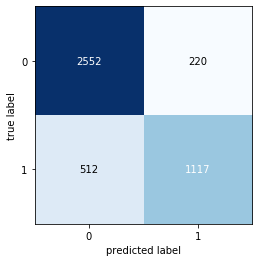

In [85]:
# crear modelo
mejor_logit = LogisticRegression(penalty='l2', C=0.01, random_state=42)

# ajustar por cv
score = cross_validate(mejor_logit, train_x, train_y, n_jobs=-1, verbose=0)

# ajustar logit
mejor_logit.fit(train_x, train_y)

# predecir
y_logit_train = mejor_logit.predict(train_x)
y_logit_test = cross_val_predict(mejor_logit, test_x, test_y)

# mostrar matriz de metricas
print(classification_report(test_y, y_logit_test, target_names=['0', '1']))

# mostrar tiempo de modelado
print("Average Time (seconds):", np.mean(score['fit_time']))

# graficar
cm = confusion_matrix(test_y, y_logit_test)

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

**Modelo de Árbol de Clasificación con Proceso de Selección de variables**

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      2772
           1       0.77      0.73      0.75      1629

    accuracy                           0.82      4401
   macro avg       0.81      0.80      0.80      4401
weighted avg       0.82      0.82      0.82      4401

Average Time (seconds): 0.1799772262573242


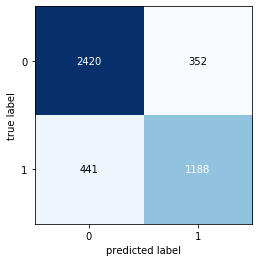

In [88]:
## ajustar árbol de clasificación al mejor modelo 

# crear modelo
mejor_dtc = DecisionTreeClassifier(max_depth=12, 
                                   max_features=13, 
                                   min_samples_leaf=9,
                                   min_samples_split=2,
                                   criterion='entropy',
                                   random_state=42)

# ajustar por cv
score = cross_validate(mejor_dtc, train_x, train_y, n_jobs=-1, verbose=0)

# ajustar
mejor_dtc.fit(train_x, train_y)

# predecir
y_dtc_train = mejor_dtc.predict(train_x)
y_dtc_test = cross_val_predict(mejor_dtc, test_x, test_y)

# mostrar matriz de metricas
print(classification_report(test_y, y_dtc_test, target_names=['0', '1']))

# mostrar tiempo de modelado
print("Average Time (seconds):", np.mean(score['fit_time']))

# graficar
cm = confusion_matrix(test_y, y_dtc_test)

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

**Modelo de XGBoost con Proceso de Selección de variables**

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      2772
           1       0.86      0.75      0.80      1629

    accuracy                           0.86      4401
   macro avg       0.86      0.84      0.85      4401
weighted avg       0.86      0.86      0.86      4401

Average Time (seconds): 15.378136253356933


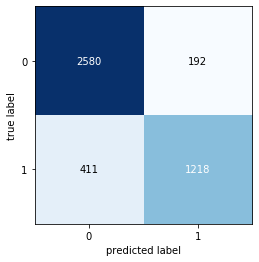

In [91]:
# crear modelo
# crear modelo
mejor_xgbc = xgb.XGBClassifier(mmin_child_weight=1,
                               gamma=2,
                               subsample=1.0,
                               colsample_bytree=1.0,
                               max_depth=5,
                               learning_rate=0.02,
                               n_estimators=600, 
                               objective='binary:logistic',
                               silent=True, 
                               nthread=1,
                               random_state=42)

# ajustar por cv
score = cross_validate(mejor_xgbc, train_x, train_y, n_jobs=-1, verbose=0)

# ajustar
mejor_xgbc.fit(train_x, train_y)

# predecir
y_xgb_train = mejor_xgbc.predict(train_x)
y_xgb_test = cross_val_predict(mejor_xgbc, test_x, test_y)

# mostrar matriz de metricas
print(classification_report(test_y, y_xgb_test, target_names=['0', '1']))

# mostrar tiempo de modelado
print("Average Time (seconds):", np.mean(score['fit_time']))

# graficar
cm = confusion_matrix(test_y, y_xgb_test)

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

**Modelo Logístico con PCA de variables**

In [0]:
datos6 = datos5.drop(['class'],axis=1)
columnas = datos6.columns.values.tolist()

In [0]:
train, test = train_test_split(datos5,test_size=0.20,random_state=42)
train_x = train[columnas]
train_y = train['class']
test_x = test[columnas]
test_y= test['class']

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      2772
           1       0.84      0.76      0.80      1629

    accuracy                           0.86      4401
   macro avg       0.85      0.84      0.85      4401
weighted avg       0.86      0.86      0.86      4401

Average Time (seconds): 15.378136253356933


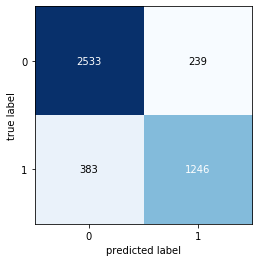

In [102]:
# Build the pipeline
pipe = Pipeline([
        ('reducer', PCA(n_components=448)),
        ('classifier', LogisticRegression(penalty='l2', C=0.01, random_state=42))])

# Fit the pipeline to the training data
pipe.fit(train_x, train_y)

# predecir
y_logit_train = pipe.predict(train_x)
y_logit_test = cross_val_predict(pipe, test_x, test_y)

# mostrar matriz de metricas
print(classification_report(test_y, y_logit_test, target_names=['0', '1']))

# mostrar tiempo de modelado
print("Average Time (seconds):", np.mean(score['fit_time']))

# graficar
cm = confusion_matrix(test_y, y_logit_test)

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

**Modelo de Árbol de Clasificación con PCA de variables**

              precision    recall  f1-score   support

           0       0.72      0.80      0.76      2772
           1       0.58      0.46      0.51      1629

    accuracy                           0.68      4401
   macro avg       0.65      0.63      0.64      4401
weighted avg       0.67      0.68      0.67      4401

Average Time (seconds): 15.378136253356933


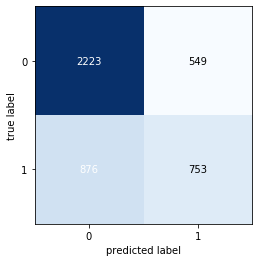

In [107]:
# Build the pipeline
pipe = Pipeline([
        ('reducer', PCA(n_components=448)),
        ('classifier', DecisionTreeClassifier(max_depth=12, 
                                   max_features=13, 
                                   min_samples_leaf=9,
                                   min_samples_split=2,
                                   criterion='entropy',
                                   random_state=42))])

# Fit the pipeline to the training data
pipe.fit(train_x, train_y)

# predecir
y_dtc_train = pipe.predict(train_x)
y_dtc_test = cross_val_predict(pipe, test_x, test_y)

# mostrar matriz de metricas
print(classification_report(test_y, y_dtc_test, target_names=['0', '1']))

# mostrar tiempo de modelado
print("Average Time (seconds):", np.mean(score['fit_time']))

# graficar
cm = confusion_matrix(test_y, y_dtc_test)

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

**Modelo de XGBoost con Proceso de Selección de variables**

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      2772
           1       0.88      0.69      0.77      1629

    accuracy                           0.85      4401
   macro avg       0.86      0.82      0.83      4401
weighted avg       0.85      0.85      0.84      4401

Average Time (seconds): 15.378136253356933


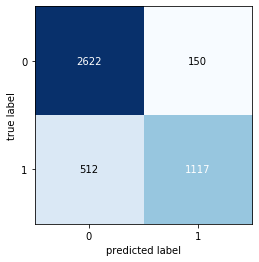

In [108]:
pipe = Pipeline([
        ('reducer', PCA(n_components=448)),
        ('classifier', xgb.XGBClassifier(mmin_child_weight=1,
                               gamma=2,
                               subsample=1.0,
                               colsample_bytree=1.0,
                               max_depth=5,
                               learning_rate=0.02,
                               n_estimators=600, 
                               objective='binary:logistic',
                               silent=True, 
                               nthread=1,
                               random_state=42))])

# Fit the pipeline to the training data
pipe.fit(train_x, train_y)

# predecir
y_xgb_train = pipe.predict(train_x)
y_xgb_test = cross_val_predict(pipe, test_x, test_y)

# mostrar matriz de metricas
print(classification_report(test_y, y_xgb_test, target_names=['0', '1']))

# mostrar tiempo de modelado
print("Average Time (seconds):", np.mean(score['fit_time']))

# graficar
cm = confusion_matrix(test_y, y_xgb_test)

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()